**Case Study: Regression and Inferential Analysis**

tugas ini meminta Anda untuk melakukan analisis regresi linear guna menentukan variabel mana yang paling berpengaruh terhadap jumlah kecelakaan lalu lintas. Berikut langkah-langkah yang dapat diikuti untuk menyelesaikan tugas ini:

**Langkah pertama : Mengimport Library Lalu Mengimport Data**

Gunakan pustaka Python seperti pandas untuk memanipulasi data, matplotlib atau seaborn untuk visualisasi, dan sklearn untuk membangun model regresi linear.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = {
    "Jumlah Kecelakaan Lalu Lintas (kasus)": [107, 113, 117, 129, 137, 99, 112, 114, 126, 101, 116, 103],
    "Faktor Pengemudi (orang)": [56, 63, 60, 61, 77, 54, 56, 56, 60, 65, 56, 59],
    "Faktor Jalan (kasus)": [31, 23, 27, 33, 31, 20, 30, 27, 20, 17, 32, 29],
    "Faktor Kendaraan (kasus)": [12, 15, 14, 9, 18, 11, 10, 11, 13, 9, 21, 14],
    "Pertumbuhan jumlah kendaraan bermotor (unit)": [873, 402, 538, 432, 746, 393, 746, 799, 516, 493, 871, 904]
}

df = pd.DataFrame(df)

**Mengeksplorasi Data**

Lakukan analisis deskriptif dan visualisasi untuk memahami hubungan antara variabel independen dan dependen.

In [3]:
print(df.describe())

       Jumlah Kecelakaan Lalu Lintas (kasus)  Faktor Pengemudi (orang)  \
count                              12.000000                 12.000000   
mean                              114.500000                 60.250000   
std                                11.587611                  6.210329   
min                                99.000000                 54.000000   
25%                               106.000000                 56.000000   
50%                               113.500000                 59.500000   
75%                               119.250000                 61.500000   
max                               137.000000                 77.000000   

       Faktor Jalan (kasus)  Faktor Kendaraan (kasus)  \
count             12.000000                 12.000000   
mean              26.666667                 13.083333   
std                5.382351                  3.629634   
min               17.000000                  9.000000   
25%               22.250000                 10.7

<Figure size 1500x800 with 0 Axes>

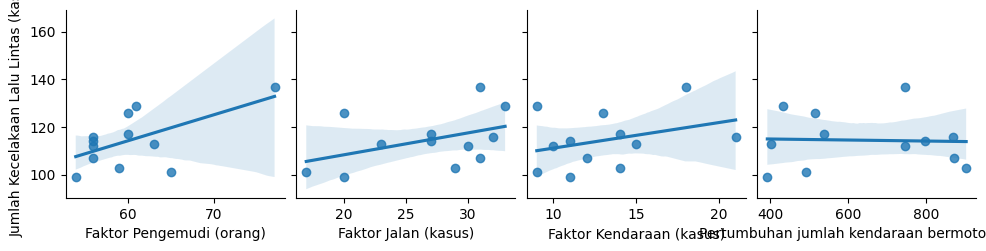

In [4]:
plt.figure(figsize=(15, 8))
sns.pairplot( data = df , x_vars=['Faktor Pengemudi (orang)','Faktor Jalan (kasus)','Faktor Kendaraan (kasus)','Pertumbuhan jumlah kendaraan bermotor (unit)'],
                     y_vars=['Jumlah Kecelakaan Lalu Lintas (kasus)'], kind='reg')
plt.show()

**Membangun Model Regresi Linear**

Pilih variabel independen untuk model.

In [14]:
# Definisi X (independent variables) dan y (dependent variable)
X = df.iloc[:, 1:]
y = df.iloc[:, :1]

# Regressor model
regressor = LinearRegression()
regressor.fit(X, y)

# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[ 0.90844505  1.34394216  0.50142411 -0.02459449]]
Intercept: [33.17553598]


Coefficient: [0.90844505, 1.34394216, 0.50142411, -0.02459449]
Koefisien ini menunjukkan besarnya pengaruh masing-masing variabel independen terhadap variabel dependen (Jumlah Kecelakaan Lalu Lintas), dengan asumsi variabel lainnya tetap konstan.


*   Faktor Pengemudi: 0.90844505 Untuk setiap peningkatan 1 unit dalam Faktor Pengemudi, jumlah kecelakaan diprediksi meningkat sebesar 0.91 kasus (asumsi variabel lain tetap konstan).


*   Faktor Jalan: 1.34394216
Faktor ini memiliki pengaruh terbesar. Peningkatan 1 kasus Faktor Jalan diprediksi meningkatkan jumlah kecelakaan sebesar 1.34 kasus.

*   Faktor Kendaraan: 0.50142411
Peningkatan 1 kasus Faktor Kendaraan diprediksi meningkatkan jumlah kecelakaan sebesar 0.50 kasus.

*   Pertumbuhan Jumlah Kendaraan Bermotor: -0.02459449
Faktor ini memiliki hubungan negatif, menunjukkan bahwa peningkatan 1 unit dalam jumlah kendaraan bermotor justru memprediksi penurunan kecil dalam jumlah kecelakaan (sekitar 0.025 kasus).

Intercept: 33.17553598
Jika semua variabel independen bernilai nol, jumlah kecelakaan yang diprediksi adalah 33.18 kasus.

In [8]:
#calculate R-squared of regression model

r_squared = regressor.score(X, y)

#view R-squared value
print(r_squared)

0.6210837387520458


Nilai R-squared (R²) yang Anda dapatkan adalah 0.6211. Berikut interpretasinya:

Apa Itu R-squared?

R-squared adalah ukuran statistik yang menjelaskan proporsi variasi pada variabel dependen (Jumlah Kecelakaan Lalu Lintas) yang dapat dijelaskan oleh variabel independen dalam model regresi.

Nilainya berkisar antara:


*   0 : Tidak ada variasi yang dapat dijelaskan oleh model (model buruk).
*   1 : Semua variasi pada variabel dependen dapat dijelaskan oleh model (model sempurna).

Interpretasi R-squared adalah (0.6211)


*   Model ini menjelaskan sekitar 62.11% variasi dalam jumlah kecelakaan lalu lintas berdasarkan variabel-variabel independen yang digunakan (Faktor Pengemudi, Faktor Jalan, Faktor Kendaraan, dan Pertumbuhan Jumlah Kendaraan Bermotor).
*   Sisanya, yaitu sekitar 37.89%, variasi dalam jumlah kecelakaan disebabkan oleh faktor lain yang tidak dijelaskan oleh model.




In [9]:
y_pred = regressor.predict(X)

In [13]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y, y_pred)
rmse

6.8292222462446155

Nilai Root Mean Squared Error (RMSE) yang Anda peroleh adalah 6.83. Berikut penjelasan dan interpretasinya:

**Apa Itu RMSE?**

RMSE adalah ukuran seberapa jauh prediksi model regresi Anda dari nilai aktual (Jumlah Kecelakaan Lalu Lintas). RMSE mengukur rata-rata deviasi (kesalahan) antara prediksi dan data sebenarnya, dalam satuan yang sama dengan variabel dependen.

**Interpretasi RMSE**



*   Nilai RMSE = 6.83: Model Anda rata-rata memiliki kesalahan prediksi sebesar 6.83 kasus kecelakaan lalu lintas.
*   Semakin rendah nilai RMSE, semakin baik model regresi dalam memprediksi nilai aktual.



**Pengecekan Pemenuhan Syarat**

In [15]:
residuals = y.values-y_pred

In [16]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 6.635204724699446), ('p-value', 0.13097225759579934)]

**Hasil Uji Anda**



1.   **F-statistic**: 6.6352
Nilai statistik uji menunjukkan perbandingan antara varians residual di dua subset data (seperti yang ditentukan oleh metode Goldfeld-Quandt).
2.   **p-value**: 0.13097
Ini adalah probabilitas yang menunjukkan seberapa besar kemungkinan bahwa heteroskedastisitas terjadi secara kebetulan. Biasanya, tingkat signifikansi (
𝛼
α) yang digunakan adalah 0.05.

**Kesimpulan**

Karena p-value 0.13 > 0.05, Anda tidak menolak hipotesis nol, yang berarti tidak ada indikasi kuat adanya heteroskedastisitas dalam model regresi Anda. Varians residual dianggap konstan dan model regresi Anda tidak mengalami masalah heteroskedastisitas.

Sederhananya P-value yang besar (lebih dari 0.05) menunjukkan bahwa model Anda tidak menunjukkan masalah dengan varians residual yang tidak konstan. Dengan kata lain, model regresi Anda aman dari masalah heteroskedastisitas berdasarkan uji ini.


In [18]:
import statsmodels.api as sm
hasil = sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

print(hasil)

    lb_stat  lb_pvalue
5  4.041584   0.543445


Penjelasan Hasil Uji Anda
Hasil uji Anda adalah:



*   lb_stat (4.041584): Ini adalah nilai statistik uji Ljung-Box, yang mengukur seberapa besar kemungkinan ada autokorelasi dalam residual hingga lag ke-5.
*   lb_pvalue (0.543445): Ini adalah peluang (probabilitas) bahwa residual tidak saling berkorelasi. Nilai ini yang kita gunakan untuk mengambil kesimpulan.

p-value = 0.543445 (lebih besar dari 0.05).
Ini berarti tidak ada bukti bahwa residual memiliki autokorelasi hingga lag ke-5. Residual dianggap independen.



